In [1]:
pip install --no-deps fastai==1.0.47

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import os
import torch
from PIL import Image
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
#import cv2
import torch.nn as nn
import torch.nn.functional as F
#import albumentations as A
import torch.optim as optim 
from torch_lr_finder import *
from torch_lr_finder import LRFinder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import asarray
from fastai import *
from fastai.vision import *
#from fastai.vision.data import ImageDataLoaders
from sklearn.model_selection import StratifiedKFold
import glob

C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
if not os.path.exists('checkpoints/'):
        os.makedirs('checkpoints/')

In [3]:
np.random.seed(42)
data = ImageDataBunch.from_folder('specs_train', train='.', valid_pct=0.2,
        ds_tfms=None, size=[224,224], num_workers=4).normalize(imagenet_stats)

C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if 

C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if 

C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if 

In [4]:
data.classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']

In [5]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\fastai\vision\learner.py:93: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\DELL/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


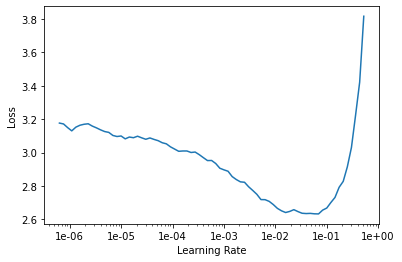

In [6]:
learn.lr_find()
learn.recorder.plot()

In [7]:
lr = 1e-02
learn.fit_one_cycle(5, slice(lr))
learn.save('stage-1-rn34')

epoch,train_loss,valid_loss,accuracy,time
0,1.684938,1.339885,0.461979,17:13
1,1.329259,1.182167,0.536386,17:08
2,1.091607,1.059146,0.585854,17:07
3,0.909347,0.965157,0.631235,17:06
4,0.781763,0.947907,0.641047,17:05


In [8]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


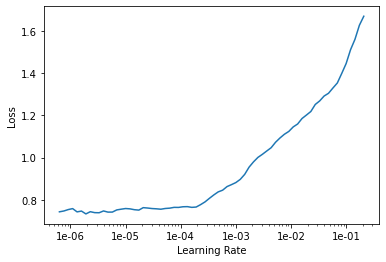

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(10, slice(5e-7, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.738881,0.944490,0.648814,22:50
1,0.727413,0.918348,0.651676,22:41
2,0.638852,0.988939,0.655356,22:42
3,0.462512,1.061648,0.665168,22:45
4,0.294261,1.163436,0.683974,22:46
5,0.164298,1.255425,0.679886,26:57
6,0.080649,1.340643,0.686427,25:14
7,0.040749,1.383395,0.688880,23:50
8,0.019087,1.393465,0.687653,25:50
9,0.015898,1.403175,0.690515,22:54


In [15]:
learn.save('stage-1-rn34_epoch')

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

In [12]:
interp.most_confused(min_val=2)

[('fear', 'sad', 65),
 ('neutral', 'sad', 48),
 ('sad', 'fear', 43),
 ('fear', 'happy', 42),
 ('disgust', 'sad', 41),
 ('happy', 'fear', 40),
 ('sad', 'neutral', 38),
 ('angry', 'happy', 35),
 ('disgust', 'angry', 33),
 ('sad', 'disgust', 32),
 ('happy', 'disgust', 31),
 ('happy', 'angry', 28),
 ('angry', 'disgust', 26),
 ('disgust', 'neutral', 26),
 ('disgust', 'fear', 25),
 ('fear', 'angry', 22),
 ('fear', 'disgust', 22),
 ('neutral', 'happy', 22),
 ('angry', 'fear', 21),
 ('neutral', 'disgust', 21),
 ('disgust', 'happy', 19),
 ('happy', 'neutral', 14),
 ('fear', 'neutral', 13),
 ('happy', 'sad', 12),
 ('neutral', 'fear', 11),
 ('sad', 'happy', 11),
 ('angry', 'neutral', 7),
 ('neutral', 'angry', 5),
 ('angry', 'sad', 3)]

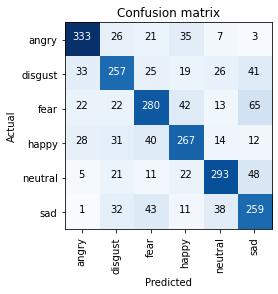

In [13]:
interp.plot_confusion_matrix()